In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [115]:
Sales_train = pd.read_csv("Data/Train.csv")
Sales_train["Type"] = "train"
print(Sales_train.shape)

(8523, 13)


In [116]:
Sales_test = pd.read_csv("Data/Test.csv")
Sales_test["Type"] = "test"
print(Sales_test.shape)

Data_Predicted = Sales_test.loc[:,["Item_Identifier","Outlet_Identifier","Item_MRP"]]  ## will use later while prediction
#Data_Predicted.head()

(5681, 12)


In [117]:
dframes = [Sales_train,Sales_test]
Sales = pd.concat(dframes,ignore_index = True)
print(Sales.shape)
Sales.tail()

(14204, 13)


,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Type
14199,Regular,FDB58,141.3154,NaN,Snack Foods,0.013496,10.5,1997,OUT046,Tier 1,Small,Supermarket Type1,test
14200,Regular,FDD47,169.1448,NaN,Starchy Foods,0.142991,7.6,2009,OUT018,Tier 3,Medium,Supermarket Type2,test
14201,Low Fat,NCO17,118.7440,NaN,Health and Hygiene,0.073529,10.0,2002,OUT045,Tier 2,NaN,Supermarket Type1,test
14202,Regular,FDJ26,214.6218,NaN,Canned,0.000000,15.3,2007,OUT017,Tier 2,NaN,Supermarket Type1,test
14203,Regular,FDU37,79.7960,NaN,Canned,0.104720,9.5,2002,OUT045,Tier 2,NaN,Supermarket Type1,test


In [118]:
Sales.describe(include="all")

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Type
count,14204,14204,14204.000000,8523.000000,14204,14204.000000,11765.000000,14204.000000,14204,14204,10188,14204,14204
unique,5,1559,NaN,NaN,16,NaN,NaN,NaN,10,3,3,4,2
top,Low Fat,FDV23,NaN,NaN,Fruits and Vegetables,NaN,NaN,NaN,OUT027,Tier 3,Medium,Supermarket Type1,train
freq,8485,10,NaN,NaN,2013,NaN,NaN,NaN,1559,5583,4655,9294,8523
mean,NaN,NaN,141.004977,2181.288914,NaN,0.065953,12.792854,1997.830681,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,62.086938,1706.499616,NaN,0.051459,4.652502,8.371664,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,31.290000,33.290000,NaN,0.000000,4.555000,1985.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,94.012000,834.247400,NaN,0.027036,8.710000,1987.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,142.247000,1794.331000,NaN,0.054021,12.600000,1999.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,185.855600,3101.296400,NaN,0.094037,16.750000,2004.000000,NaN,NaN,NaN,NaN,NaN


## Visibility can't be 0
###### hence imputing it

In [119]:
Sales["Item_Visibility"].describe()

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

In [120]:
UniqueItems = set(Sales.Item_Identifier)
for each in UniqueItems:
    Sales.loc[(Sales["Item_Identifier"]==str(each)) & (Sales["Item_Visibility"]==0),"Item_Visibility"] = Sales.loc[(Sales["Item_Identifier"]==str(each)) & (Sales["Item_Visibility"]!=0),"Item_Visibility"].mean()
Sales["Item_Visibility"].describe()

count    14204.000000
mean         0.070458
std          0.050086
min          0.003575
25%          0.031381
50%          0.058064
75%          0.098042
max          0.328391
Name: Item_Visibility, dtype: float64

### Adding new feature Quantity Sold

In [121]:
Sales["Qty_Sold"] = (Sales["Item_Outlet_Sales"]/Sales["Item_MRP"])
Sales.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Type,Qty_Sold
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,14.951963
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,9.186454
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,14.809346
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.022930,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,train,4.021967
4,Low Fat,NCD19,53.8614,994.7052,Household,0.014670,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,18.467868


In [122]:
Sales.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
Type                            0
Qty_Sold                     5681
dtype: int64

### To impute "Item_Weight", we are filtering the data for each unique "Item_Identifier" and then assigning the mean value of that category to the one which is "NA"

In [123]:
for each in UniqueItems:
    Sales.loc[(Sales["Item_Identifier"]==str(each)) & (Sales["Item_Weight"].isnull()),"Item_Weight"] = Sales.loc[Sales["Item_Identifier"]==str(each),"Item_Weight"].mode()[0]

### cheking the imputation

In [124]:
Sales.Item_Weight.isnull().sum()

0

### Changing the Year Establishment year to Age

In [125]:
import datetime
now = datetime.datetime.now()
now.year

Sales["Outlet_Age"] = now.year - Sales["Outlet_Establishment_Year"]
Sales["Outlet_Age"].head()

0    18
1     8
2    18
3    19
4    30
Name: Outlet_Age, dtype: int64

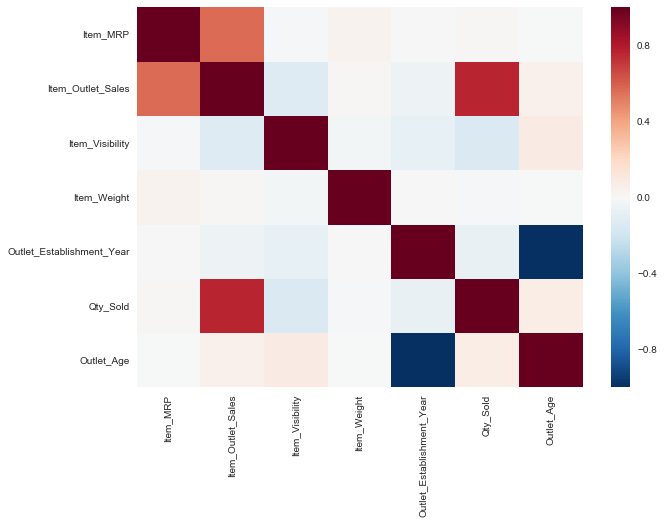

In [126]:
plt.figure(figsize=(10,7))
sns.heatmap(Sales.corr())

In [127]:
Sales.describe(include=["object"]).columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'Type'],
      dtype='object')

In [128]:
Sales.Outlet_Size.value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [129]:
Sales.loc[Sales["Outlet_Size"].isnull(),"Outlet_Identifier"].value_counts()

OUT045    1548
OUT017    1543
OUT010     925
Name: Outlet_Identifier, dtype: int64

### Looking for pattern for the missing Outlet_size

In [130]:
Sales.loc[(Sales["Outlet_Size"].isnull()) & (Sales["Outlet_Identifier"] == "OUT045") ,].describe(include = [object])

,Item_Fat_Content,Item_Identifier,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Type
count,1548,1548,1548,1548,1548,0.0,1548,1548
unique,5,1548,16,1,1,0.0,1,2
top,Low Fat,DRG51,Snack Foods,OUT045,Tier 2,NaN,Supermarket Type1,train
freq,932,1,218,1548,1548,NaN,1548,929


In [131]:
Sales.loc[(Sales["Outlet_Size"].isnull()) & (Sales["Outlet_Identifier"] == "OUT017") ,].describe(include = [object])

,Item_Fat_Content,Item_Identifier,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Type
count,1543,1543,1543,1543,1543,0.0,1543,1543
unique,5,1543,16,1,1,0.0,1,2
top,Low Fat,DRG51,Snack Foods,OUT017,Tier 2,NaN,Supermarket Type1,train
freq,928,1,219,1543,1543,NaN,1543,926


In [132]:
Sales.loc[(Sales["Outlet_Size"].isnull()) & (Sales["Outlet_Identifier"] == "OUT010") ,].describe(include = [object])

,Item_Fat_Content,Item_Identifier,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Type
count,925,925,925,925,925,0.0,925,925
unique,5,925,16,1,1,0.0,1,2
top,Low Fat,DRG51,Fruits and Vegetables,OUT010,Tier 3,NaN,Grocery Store,train
freq,543,1,137,925,925,NaN,925,555


### As for OUT045 and OUT017; Outlet_Location_Type	and Outlet_Type are same i.e. Tier 2 and Supermarket Type1, hence we can impute the data as per this

In [133]:
Sales.loc[(Sales["Outlet_Location_Type"]== "Tier 2") & (Sales["Outlet_Type"]=="Supermarket Type1") ,"Outlet_Size"].value_counts()

Small    1550
Name: Outlet_Size, dtype: int64

In [134]:
Sales.loc[(Sales["Outlet_Size"].isnull()) & (Sales["Outlet_Identifier"].isin(["OUT045","OUT017"])) ,"Outlet_Size"] = "Small"
Sales.loc[ (Sales["Outlet_Identifier"].isin(["OUT045","OUT017"])) ,"Outlet_Size"].value_counts()

Small    3091
Name: Outlet_Size, dtype: int64

## for "OUT010"

In [135]:
Sales.loc[(Sales["Outlet_Location_Type"]== "Tier 3") & (Sales["Outlet_Type"]=="Grocery Store") ,"Outlet_Size"].value_counts()

Series([], Name: Outlet_Size, dtype: int64)

In [136]:
Sales.loc[(Sales["Outlet_Type"]=="Grocery Store") ,"Outlet_Size"].value_counts()

Small    880
Name: Outlet_Size, dtype: int64

In [137]:
Sales.loc[(Sales["Outlet_Location_Type"]== "Tier 3") ,"Outlet_Size"].value_counts()

Medium    3105
High      1553
Name: Outlet_Size, dtype: int64

In [138]:
Sales.loc[Sales["Outlet_Size"].isnull(),].shape

(925, 15)

In [139]:
Sales['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

### To impute "Outlet_Size for OUT010", we will build a classifier

### Changing the categorical data to numeric/dummy

##### imputing ordinal data

In [140]:
mapping_Item_Type = {'Fruits and Vegetables': "Fruit_Veg",
                    'Household':"HH_HH", 'Health and Hygiene':"HH_HH",
                    'Baking Goods': "Bake_Snacks", 'Snack Foods': "Bake_Snacks",
                    'Canned': "Frozen_Canned", 'Frozen Foods': "Frozen_Canned",
                    'Dairy': "DBBS", 'Breakfast': "DBBS", 'Breads': "DBBS", 'Starchy Foods': "DBBS",
                    'Seafood':"Seafood_Meat", 'Meat': "Seafood_Meat",
                    'Hard Drinks': "Drinks", 'Soft Drinks': "Drinks",
                    'Others':"Others"}
Sales['Item_Type'] = Sales['Item_Type'].map(mapping_Item_Type)

mapping_Item_Fat_Content = {'Regular': 1, "reg": 1,'LF': 0,'Low Fat': 0, "low fat":0}
Sales['Item_Fat_Content'] = Sales['Item_Fat_Content'].map(mapping_Item_Fat_Content)

mapping_Outlet_Size = {'Small': 1, "Medium": 2,'High': 3}
Sales['Outlet_Size'] = Sales['Outlet_Size'].map(mapping_Outlet_Size)

In [141]:
Sales.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Type,Qty_Sold,Outlet_Age
0,0,FDA15,249.8092,3735.1380,DBBS,0.016047,9.30,1999,OUT049,Tier 1,2.0,Supermarket Type1,train,14.951963,18
1,1,DRC01,48.2692,443.4228,Drinks,0.019278,5.92,2009,OUT018,Tier 3,2.0,Supermarket Type2,train,9.186454,8
2,0,FDN15,141.6180,2097.2700,Seafood_Meat,0.016760,17.50,1999,OUT049,Tier 1,2.0,Supermarket Type1,train,14.809346,18
3,1,FDX07,182.0950,732.3800,Fruit_Veg,0.022930,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,train,4.021967,19
4,0,NCD19,53.8614,994.7052,HH_HH,0.014670,8.93,1987,OUT013,Tier 3,3.0,Supermarket Type1,train,18.467868,30


##### imputing nominal data

In [142]:
Sales = pd.get_dummies(Sales,columns=["Item_Type","Outlet_Identifier","Outlet_Location_Type","Outlet_Type"],drop_first=True)

In [143]:
Sales.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Size,Type,Qty_Sold,...,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0,FDA15,249.8092,3735.1380,0.016047,9.30,1999,2.0,train,14.951963,...,0,0,0,0,1,0,0,1,0,0
1,1,DRC01,48.2692,443.4228,0.019278,5.92,2009,2.0,train,9.186454,...,0,0,0,0,0,0,1,0,1,0
2,0,FDN15,141.6180,2097.2700,0.016760,17.50,1999,2.0,train,14.809346,...,0,0,0,0,1,0,0,1,0,0
3,1,FDX07,182.0950,732.3800,0.022930,19.20,1998,NaN,train,4.021967,...,0,0,0,0,0,0,1,0,0,0
4,0,NCD19,53.8614,994.7052,0.014670,8.93,1987,3.0,train,18.467868,...,0,0,0,0,0,0,1,1,0,0


In [144]:
Sales.columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Visibility', 'Item_Weight', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Type', 'Qty_Sold', 'Outlet_Age', 'Item_Type_DBBS',
       'Item_Type_Drinks', 'Item_Type_Frozen_Canned', 'Item_Type_Fruit_Veg',
       'Item_Type_HH_HH', 'Item_Type_Others', 'Item_Type_Seafood_Meat',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [145]:
X_Cols = ['Item_Fat_Content', 'Item_MRP',
       'Item_Visibility', 'Item_Weight',
       'Qty_Sold', 'Outlet_Age', 'Item_Type_DBBS',
       'Item_Type_Drinks', 'Item_Type_Frozen_Canned', 'Item_Type_Fruit_Veg',
       'Item_Type_HH_HH', 'Item_Type_Others', 'Item_Type_Seafood_Meat',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3']
y_cols = 'Outlet_Size'

In [146]:
from sklearn.model_selection import train_test_split
X = Sales.loc[(Sales[y_cols].notnull()) & (Sales['Type'] == "train"), X_Cols]
y = Sales.loc[(Sales[y_cols].notnull()) & (Sales['Type'] == "train"), y_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [147]:
print("Shape of X_train: ",X_train.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of y_test: ",y_test.shape)

Shape of X_train:  (5577, 27)
Shape of y_train:  (5577,)
Shape of X_test:  (2391, 27)
Shape of y_test:  (2391,)


In [148]:
Sales[y_cols].value_counts()

1.0    7071
2.0    4655
3.0    1553
Name: Outlet_Size, dtype: int64

### As there are 3 categories, we can use all the classificaition techniques except Logistic Regression

## Trying K-Nearest Neighbours

In [149]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [150]:
def IdentifyKValueCrossValidation(X,Y,startK,endK,cv,scoring):
    k_range = list(range(startK, endK+1))
    k_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, Y, cv=cv, scoring=scoring)
        k_scores.append(scores.mean())
    z = [i for i, j in enumerate(k_scores) if j == max(k_scores)]
    
    print("Location for Max Accuaracy is:")
    
    for i in z:
        print(k_range[i])
    
    # plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
    plt.plot(k_range, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    
    return k_range[i]

def metrices(Predicted,Actual):
    print("Confusion Matrix for the model is:\n\n {}".format(metrics.confusion_matrix(y_pred=Predicted,y_true=Actual)))
    print("\nAccuracy for the model is: {}".format(metrics.accuracy_score(y_pred=Predicted, y_true= Actual)))
    print("\nArea under the curve for the model is: {}".format(metrics.roc_auc_score(y_score=Predicted,y_true=Actual)))
    print("\nClassification Report for the model is:\n {}".format(metrics.classification_report(y_pred=Y_Predict,y_true=y_test)))

Location for Max Accuaracy is:
1
Value of K with is: 1


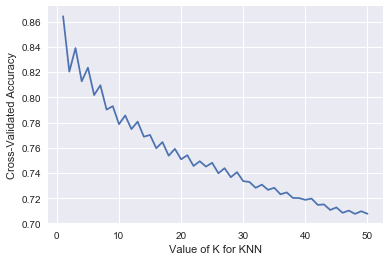

In [151]:
from sklearn.cross_validation import cross_val_score

K = IdentifyKValueCrossValidation(X=X,Y=y,cv=5,startK=1,endK=50,scoring="accuracy")
print("Value of K with is: {}".format(K))

In [152]:
knn = KNeighborsClassifier(n_neighbors=K)
y_predicted = knn.fit(X_train,y_train).predict(X_test)
print("Test Accuracy: ", (y_predicted == y_test).astype(int).sum()/y_test.shape[0])

Test Accuracy:  0.851944792974


In [153]:
pd.Series(knn.predict(X=Sales.loc[(Sales[y_cols].isnull()) & (Sales['Type'] == "train"), X_Cols])).value_counts()

1.0    303
2.0    252
dtype: int64

### Multinomial Classifier

In [154]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

In [155]:
md = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X_train, y_train)

In [156]:
y_predicted = md.predict(X=X_test)
print("Test Accuracy: ", (y_predicted == y_test).astype(int).sum()/y_test.shape[0])
#pd.Series(y_predicted).value_counts()

Test Accuracy:  1.0


In [157]:
pd.Series(md.predict(X=Sales.loc[(Sales[y_cols].isnull()) & (Sales['Type'] == "train"), X_Cols])).value_counts()

2.0    555
dtype: int64

### AdaBoost

In [158]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, X_train, y_train)
scores.mean() 

1.0

In [159]:
clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=None)

In [160]:
pd.Series(clf.predict(X=Sales.loc[(Sales[y_cols].isnull()) & (Sales['Type'] == "train"), X_Cols])).value_counts()

2.0    555
dtype: int64

### As majority of the predictions for Multinomial and AdaBoost was 100% accuracy were Medium, hence we will impute accordingly

In [161]:
Sales.loc[(Sales["Outlet_Size"].isnull()),"Outlet_Size"] = 2
Sales["Outlet_Size"].value_counts()

1.0    7071
2.0    5580
3.0    1553
Name: Outlet_Size, dtype: int64

In [162]:
Sales["Outlet_Size"] = Sales["Outlet_Size"].astype(int).astype(object)
Sales["Outlet_Size"].value_counts()

1    7071
2    5580
3    1553
Name: Outlet_Size, dtype: int64

In [163]:
Sales.isnull().sum()

Item_Fat_Content                    0
Item_Identifier                     0
Item_MRP                            0
Item_Outlet_Sales                5681
Item_Visibility                     0
Item_Weight                         0
Outlet_Establishment_Year           0
Outlet_Size                         0
Type                                0
Qty_Sold                         5681
Outlet_Age                          0
Item_Type_DBBS                      0
Item_Type_Drinks                    0
Item_Type_Frozen_Canned             0
Item_Type_Fruit_Veg                 0
Item_Type_HH_HH                     0
Item_Type_Others                    0
Item_Type_Seafood_Meat              0
Outlet_Identifier_OUT013            0
Outlet_Identifier_OUT017            0
Outlet_Identifier_OUT018            0
Outlet_Identifier_OUT019            0
Outlet_Identifier_OUT027            0
Outlet_Identifier_OUT035            0
Outlet_Identifier_OUT045            0
Outlet_Identifier_OUT046            0
Outlet_Ident

## Hurray! Imputing is DONE!

In [164]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [165]:
Sales.columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Visibility', 'Item_Weight', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Type', 'Qty_Sold', 'Outlet_Age', 'Item_Type_DBBS',
       'Item_Type_Drinks', 'Item_Type_Frozen_Canned', 'Item_Type_Fruit_Veg',
       'Item_Type_HH_HH', 'Item_Type_Others', 'Item_Type_Seafood_Meat',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [166]:
XCols = ['Item_Fat_Content', 'Item_MRP',
       'Item_Visibility', 'Item_Weight',
       'Outlet_Size', 'Outlet_Age', 'Item_Type_DBBS',
       'Item_Type_Drinks', 'Item_Type_Frozen_Canned', 'Item_Type_Fruit_Veg',
       'Item_Type_HH_HH', 'Item_Type_Others', 'Item_Type_Seafood_Meat',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3']
YCols = 'Qty_Sold'

In [167]:
XX = Sales.loc[Sales["Type"]=="train",XCols]
yy = Sales.loc[Sales["Type"]=="train",YCols]
print(XX.shape)
print(yy.shape)
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.3, random_state=5)

(8523, 27)
(8523,)


### Linear Regression with all the columns

In [168]:
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=True,normalize=True)
reg.fit (XX_train,yy_train)
print(reg.intercept_)
reg.coef_

3.95846698548


array([  3.62534516e-01,   1.97125177e-03,  -4.75344569e-01,
        -2.41986204e-02,   4.46190132e-02,   9.67378310e-02,
        -3.26130084e-01,   4.12913460e-02,  -5.16302906e-02,
         2.04488397e-01,   5.14234912e-02,  -2.63428399e-01,
         4.12101856e-02,   5.39592959e+00,   2.47052074e+00,
         6.28876741e+00,  -4.64406211e+00,   1.15404264e+01,
         1.97612887e+00,   5.60706140e-01,   3.05114647e+00,
         3.46491004e+00,   2.21588498e+00,  -3.56499323e+00,
         7.29245908e+00,   6.28876741e+00,   1.15404264e+01])

In [169]:
print(len(reg.coef_))
len(XCols)

27


27

In [170]:
coef1 = pd.DataFrame(reg.coef_,XCols,columns=["Value"])
#coef1[coef1["Value"]>0].sort_values(by="Value",ascending=False)

In [171]:
yy_predicted = reg.predict(XX_test)
metrics.mean_squared_error(y_true=yy_test, y_pred=yy_predicted)

48.699882096521847

In [172]:
r2_score(yy_test, yy_predicted)

0.41814067440785574

### LASSO

In [173]:
Lasso = linear_model.LassoCV(cv=5,normalize=True,random_state=10,alphas=[.0005])
Lasso
Lasso.fit(XX_train,yy_train)
print(Lasso.intercept_)
coef1 = pd.DataFrame(Lasso.coef_,XCols,columns=["Value"])
coef1[coef1["Value"]>0].sort_values(by="Value",ascending=False)

2.97492832795


,Value
Outlet_Type_Supermarket Type1,13.441345
Outlet_Identifier_OUT027,12.640825
Outlet_Type_Supermarket Type3,11.181365
Outlet_Type_Supermarket Type2,10.809769
Outlet_Identifier_OUT017,0.499518
Outlet_Identifier_OUT035,0.316412
Item_Fat_Content,0.276729
Outlet_Identifier_OUT049,0.158667
Item_Type_Fruit_Veg,0.123331
Item_MRP,0.001319


In [174]:
yy_predicted = Lasso.predict(XX_test)
print(metrics.mean_squared_error(y_true=yy_test, y_pred=yy_predicted))
print(r2_score(yy_test, yy_predicted))

48.6568713725
0.418654560475


In [175]:
Lasso.fit(XX,yy)

LassoCV(alphas=[0.0005], copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=True, positive=False,
    precompute='auto', random_state=10, selection='cyclic', tol=0.0001,
    verbose=False)

## Adaptive Boost

In [176]:
from sklearn.ensemble import AdaBoostRegressor
regressor = AdaBoostRegressor(n_estimators=100,loss="linear",learning_rate=.005)

In [177]:
regressor.fit(XX_train, yy_train)

AdaBoostRegressor(base_estimator=None, learning_rate=0.005, loss='linear',
         n_estimators=100, random_state=None)

In [178]:
yy_predicted = regressor.predict(XX_test)
print(metrics.mean_squared_error(y_true=yy_test, y_pred=yy_predicted))
print(r2_score(yy_test, yy_predicted))

48.6985638867
0.418156424193


In [179]:
regressor.fit(XX,yy)

AdaBoostRegressor(base_estimator=None, learning_rate=0.005, loss='linear',
         n_estimators=100, random_state=None)

### Ridge

In [180]:
Ridge = linear_model.Ridge(random_state=10,normalize=True,alpha=.001)
Ridge

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=10, solver='auto', tol=0.001)

In [181]:
Ridge.fit(XX_train,yy_train)
#print(Ridge.intercept_)
coef1 = pd.DataFrame(Ridge.coef_,XCols,columns=["Value"])
#coef1[coef1["Value"]>0].sort_values(by="Value",ascending=False)

In [182]:
yy_predicted = Ridge.predict(XX_test)
print(metrics.mean_squared_error(y_true=yy_test, y_pred=yy_predicted))
print(r2_score(yy_test, yy_predicted))

48.6985161216
0.418156994884


In [183]:
Ridge.fit(XX,yy)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=10, solver='auto', tol=0.001)

### Decision tree for Regression

In [184]:
from sklearn.tree import DecisionTreeRegressor
Dtree = DecisionTreeRegressor(max_depth=3)
Dtree.fit(XX_train,yy_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [185]:
yy_predicted = Dtree.predict(XX_test)
print(metrics.mean_squared_error(y_true=yy_test, y_pred=yy_predicted))
print(r2_score(yy_test, yy_predicted))

48.8654101929
0.416162968049


In [186]:
Dtree.fit(XX,yy)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [187]:
from sklearn.ensemble import RandomForestRegressor
RForrest = RandomForestRegressor()
RForrest.fit(XX_train,yy_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [188]:
yy_predicted = Dtree.predict(XX_test)
print(metrics.mean_squared_error(y_true=yy_test, y_pred=yy_predicted))
print(r2_score(yy_test, yy_predicted))

48.4441102797
0.421196600017


In [189]:
Dtree.fit(XX,yy)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

## Testing the MODEL to real world data

In [190]:
Sales_Predict = Sales.loc[Sales["Type"]=="test",XCols]
Sales_Predict.head()

,Item_Fat_Content,Item_MRP,Item_Visibility,Item_Weight,Outlet_Size,Outlet_Age,Item_Type_DBBS,Item_Type_Drinks,Item_Type_Frozen_Canned,Item_Type_Fruit_Veg,...,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
8523,0,107.8622,0.007565,20.750,2,18,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
8524,1,87.3198,0.038428,8.300,1,10,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
8525,0,241.7538,0.099575,14.600,2,19,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8526,0,155.0340,0.015388,7.315,1,10,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
8527,1,234.2300,0.118599,13.600,2,32,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1


##### Combining LASSO, ADB and Ridge together

In [191]:
Lasso_Prediction = Lasso.predict(Sales_Predict)
ADB_Prediction = regressor.predict(Sales_Predict)
Ridge_Prediction = Ridge.predict(Sales_Predict)
RForrest_Prediction = RForrest.predict(Sales_Predict)
Dtree_Prediction = Dtree.predict(Sales_Predict)

In [192]:
print(Lasso_Prediction[:5])
print(ADB_Prediction[:5])
print(Ridge_Prediction[:5])
print(RForrest_Prediction[:5])
print(Dtree_Prediction[:5])

[ 16.38839972  16.53388655   3.02660887  16.50001025  26.61073934]
[ 16.33484056  16.57425738   2.42216158  16.61055748  26.58539149]
[ 16.36215476  16.58448813   2.56700997  16.6545641   26.76259173]
[ 19.14581415  17.0575848    2.0014094   14.70315992  29.76249501]
[ 16.49094575  16.49094575   2.41317621  16.49094575  26.50672595]


In [193]:
#Data_Predicted

In [194]:
Data_Predicted["Lasso_Prediction"] = pd.Series(Lasso_Prediction) * Data_Predicted["Item_MRP"]
Data_Predicted["ADB_Prediction"] = pd.Series(ADB_Prediction) * Data_Predicted["Item_MRP"]
Data_Predicted["Ridge_Prediction"] = pd.Series(Ridge_Prediction) * Data_Predicted["Item_MRP"]
Data_Predicted["DTree_Prediction"] = pd.Series(Dtree_Prediction) * Data_Predicted["Item_MRP"]
Data_Predicted["RForrest_Prediction"] = pd.Series(RForrest_Prediction) * Data_Predicted["Item_MRP"]

In [195]:
Data_Predicted["Item_Outlet_Sales"] = (Data_Predicted["Lasso_Prediction"]+Data_Predicted["ADB_Prediction"]+Data_Predicted["ADB_Prediction"]+Data_Predicted["DTree_Prediction"]+Data_Predicted["RForrest_Prediction"])/5

In [196]:
Data_Predicted.drop(["Item_MRP","Lasso_Prediction","ADB_Prediction","Ridge_Prediction","RForrest_Prediction","DTree_Prediction"],axis=1,inplace=True)
Data_Predicted.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1827.074370
1,FDW14,OUT017,1453.541665
2,NCN55,OUT010,594.014115
3,FDQ58,OUT017,2508.922381
4,FDY38,OUT027,6373.433120


In [197]:
Data_Predicted.to_csv("Data/SalesPrediction_submission.csv", index=False)

### The END!